In [4]:
import lec
import xarray
import numpy as np

vmecOutput = "./../testField/wout_heliotron.nc" 
surf = lec.Surface.readVMECOutput(vmecOutput)
iota = float(xarray.open_dataset(vmecOutput)["iotas"].values[-1])

In [5]:
equHeliotron= lec.SurfaceEquilibrium(surf=surf, iota=iota)
equHeliotron.run()

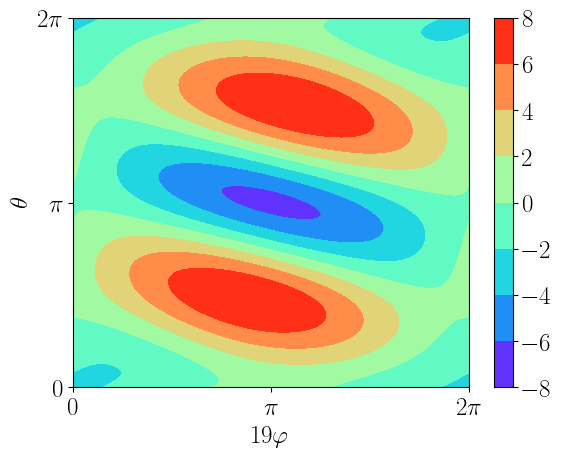

In [6]:
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
equHeliotron.Jacobian.plot_plt(ax=ax, fig=fig)

/mnt/f/Codes/LEC/lec/solver/problem.py:53: RuntimeWarning: invalid value encountered in power
  colorbar.ax.tick_params(labelsize=18)


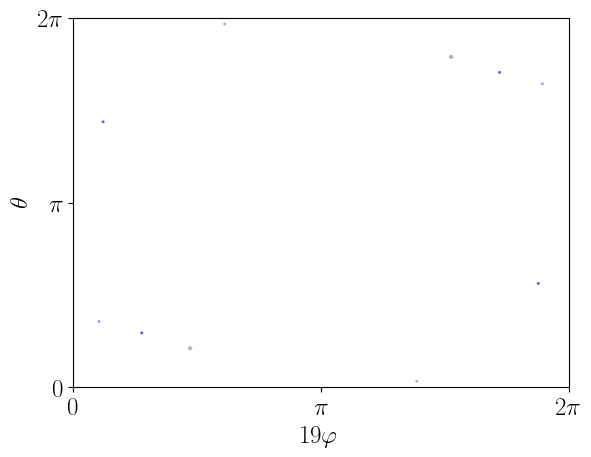

In [7]:
fig, ax = plt.subplots()
equHeliotron.plotB(ax=ax, fig=fig)